In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
covid_df = pd.read_csv("sample_covid_dataset.csv")
covid_df

,country,latitude,longitude,total_cases,total_deaths,date
0,Spain,40.4637,-3.7492,5000000,85000,2025-02-10
1,Italy,41.8719,12.5674,4500000,130000,2025-02-10
2,Germany,51.1657,10.4515,6000000,100000,2025-02-10
3,France,46.6034,1.8883,5500000,120000,2025-02-10
4,United Kingdom,55.3781,-3.4360,7000000,140000,2025-02-10
5,United States,37.0902,-95.7129,35000000,600000,2025-02-10
6,Brazil,-14.2350,-51.9253,25000000,500000,2025-02-10
7,India,20.5937,78.9629,30000000,400000,2025-02-10
8,Russia,61.5240,105.3188,10000000,200000,2025-02-10
9,China,35.8617,104.1954,100000,5000,2025-02-10


In [ ]:
covid_df["geometry"] = covid_df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
covid_df

,country,latitude,longitude,total_cases,total_deaths,date,geometry
0,Spain,40.4637,-3.7492,5000000,85000,2025-02-10,POINT (-3.7492 40.4637)
1,Italy,41.8719,12.5674,4500000,130000,2025-02-10,POINT (12.5674 41.8719)
2,Germany,51.1657,10.4515,6000000,100000,2025-02-10,POINT (10.4515 51.1657)
3,France,46.6034,1.8883,5500000,120000,2025-02-10,POINT (1.8883 46.6034)
4,United Kingdom,55.3781,-3.4360,7000000,140000,2025-02-10,POINT (-3.436 55.3781)
5,United States,37.0902,-95.7129,35000000,600000,2025-02-10,POINT (-95.7129 37.0902)
6,Brazil,-14.2350,-51.9253,25000000,500000,2025-02-10,POINT (-51.9253 -14.235)
7,India,20.5937,78.9629,30000000,400000,2025-02-10,POINT (78.9629 20.5937)
8,Russia,61.5240,105.3188,10000000,200000,2025-02-10,POINT (105.3188 61.524)
9,China,35.8617,104.1954,100000,5000,2025-02-10,POINT (104.1954 35.8617)


In [ ]:
covid_gdf = gpd.GeoDataFrame(covid_df, geometry="geometry", crs="EPSG:4326")
covid_gdf

,country,latitude,longitude,total_cases,total_deaths,date,geometry
0,Spain,40.4637,-3.7492,5000000,85000,2025-02-10,POINT (-3.7492 40.4637)
1,Italy,41.8719,12.5674,4500000,130000,2025-02-10,POINT (12.5674 41.8719)
2,Germany,51.1657,10.4515,6000000,100000,2025-02-10,POINT (10.4515 51.1657)
3,France,46.6034,1.8883,5500000,120000,2025-02-10,POINT (1.8883 46.6034)
4,United Kingdom,55.3781,-3.4360,7000000,140000,2025-02-10,POINT (-3.436 55.3781)
5,United States,37.0902,-95.7129,35000000,600000,2025-02-10,POINT (-95.7129 37.0902)
6,Brazil,-14.2350,-51.9253,25000000,500000,2025-02-10,POINT (-51.9253 -14.235)
7,India,20.5937,78.9629,30000000,400000,2025-02-10,POINT (78.9629 20.5937)
8,Russia,61.5240,105.3188,10000000,200000,2025-02-10,POINT (105.3188 61.524)
9,China,35.8617,104.1954,100000,5000,2025-02-10,POINT (104.1954 35.8617)


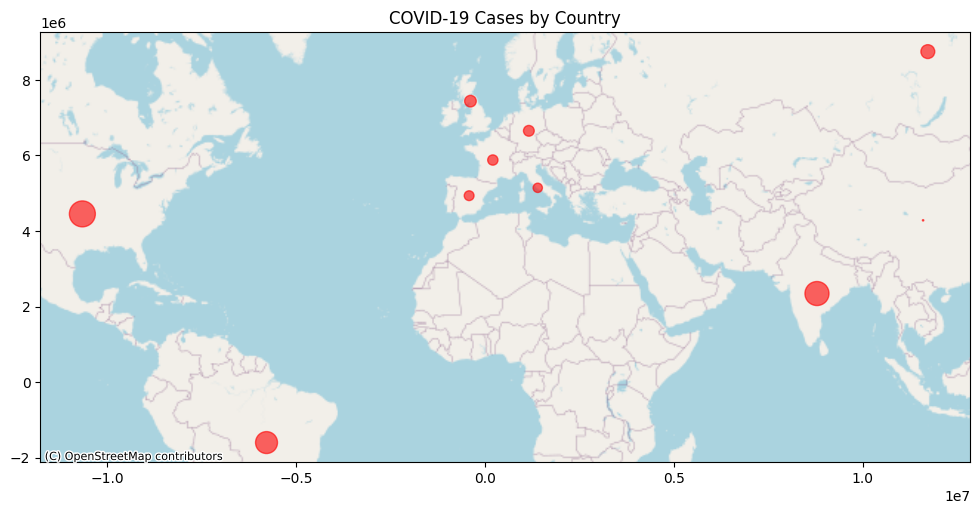

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Ensure your GeoDataFrame is reprojected to Web Mercator (EPSG:3857)
covid_gdf_mercator = covid_gdf.to_crs(epsg=3857)

# Plot the data with the correct projection
ax = covid_gdf_mercator.plot(figsize=(12, 8), color="red", markersize=covid_gdf_mercator["total_cases"] / 100000, alpha=0.6)

# Add a basemap using Web Mercator projection
ctx.add_basemap(ax, crs=covid_gdf_mercator.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("COVID-19 Cases by Country")
plt.show()


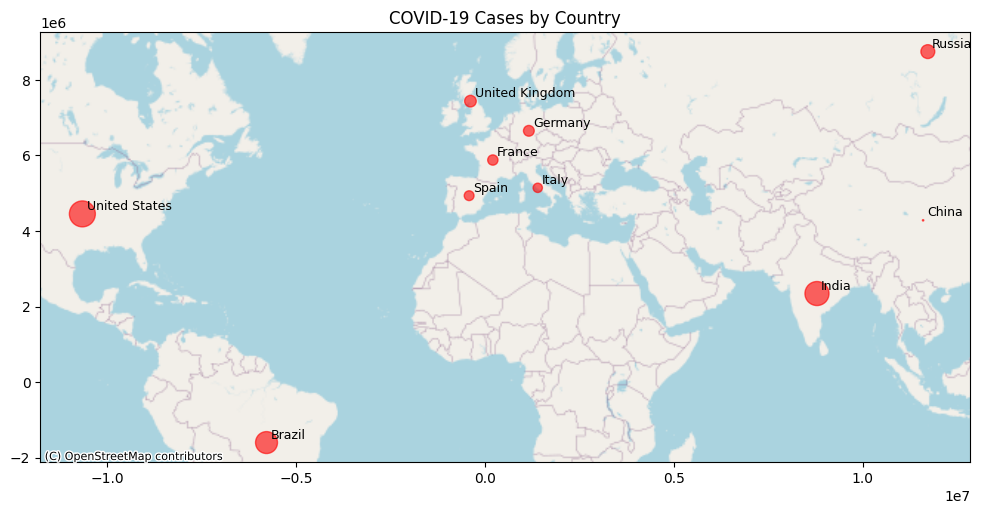

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Ensure your GeoDataFrame is reprojected to Web Mercator (EPSG:3857)
covid_gdf_mercator = covid_gdf.to_crs(epsg=3857)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
covid_gdf_mercator.plot(ax=ax, color="red", markersize=covid_gdf_mercator["total_cases"] / 100000, alpha=0.6)

# Add country names as labels
for x, y, label in zip(covid_gdf_mercator.geometry.x, covid_gdf_mercator.geometry.y, covid_gdf_mercator["country"]):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=9, color="black")

# Add a basemap
ctx.add_basemap(ax, crs=covid_gdf_mercator.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("COVID-19 Cases by Country")
plt.show()


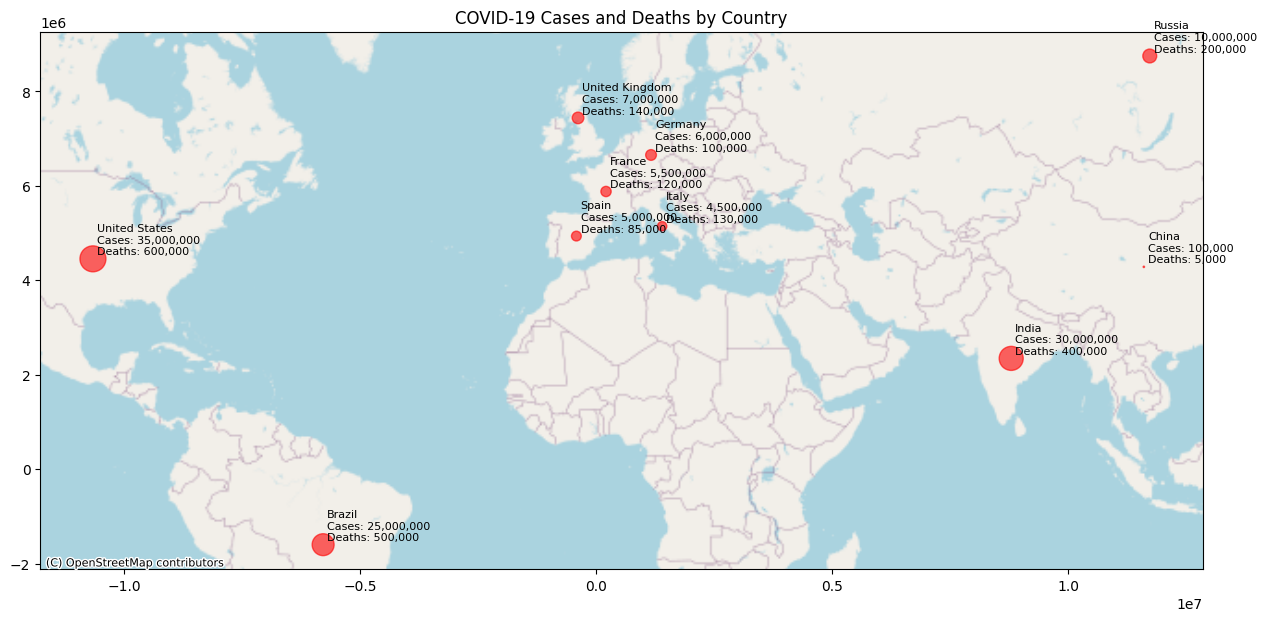

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Ensure your GeoDataFrame is reprojected to Web Mercator (EPSG:3857)
covid_gdf_mercator = covid_gdf.to_crs(epsg=3857)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))
covid_gdf_mercator.plot(ax=ax, color="red", markersize=covid_gdf_mercator["total_cases"] / 100000, alpha=0.6)

# Add country name, total cases, and total deaths as labels
for x, y, country, cases, deaths in zip(
    covid_gdf_mercator.geometry.x, covid_gdf_mercator.geometry.y,
    covid_gdf_mercator["country"], covid_gdf_mercator["total_cases"], covid_gdf_mercator["total_deaths"]
):
    label = f"{country}\nCases: {cases:,}\nDeaths: {deaths:,}"
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color="black")

# Add a basemap
ctx.add_basemap(ax, crs=covid_gdf_mercator.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("COVID-19 Cases and Deaths by Country")
plt.show()
